In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [2]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2017/11/15
Revised on 2020/2/14 (Nair & Abraham 2010)
For test only.

"""

from keras.models import model_from_json
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72


In [3]:
%run ../data_preparation/FILE_IO_FUNCTIONS.ipynb
x = load_data(data="CG_611", count=1)

In [4]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
y_pred_prob = loaded_model.predict(x)
y_pred = y_pred_prob.argmax(axis=1)

Loaded model from disk


<IPython.core.display.Javascript object>


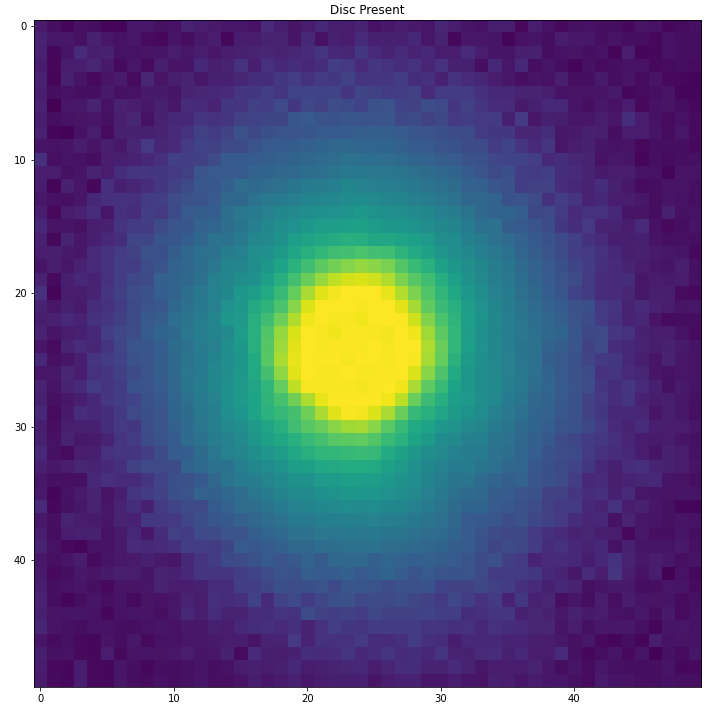

[[1 1]]
[[1.9378428e-11 1.0000000e+00]]


In [5]:
%run .\plotting_helpers.ipynb
plot_classification_results(images=x, display_size=(1, 1), y_preds=y_pred, y_labels=("No Disc", "Disc Present"))

unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)
print(y_pred_prob)